# Fourier Transforms in Financial Markets Data Filtering

## Introduction
In financial markets, data is often noisy due to various market activities and external factors. Filtering this noise is crucial for accurate analysis and decision-making. One powerful technique for data filtering is the Fourier Transform, which transforms data from the time domain to the frequency domain, allowing for the identification and removal of noise components.

In this notebook, we will explore the theory of Fourier Transforms and demonstrate how to apply this technique to filter data in financial markets using historical data for SPY (S&P 500 ETF). We will also provide additional analyses and tools that are valuable for long-term investors.


## Fourier Transform Theory

**Basics of Fourier Transforms**
The Fourier Transform is a mathematical operation that transforms a time-domain signal into its constituent frequencies. It is widely used in signal processing to analyze the frequency components of a signal.

**Mathematical Representation**
The Fourier Transform of a function f(t) is given by:
\[ F(omega) = \int_{-\infty}^{\infty} f(t) e^{-i \omega t} \, dt \]

**Inverse Fourier Transform**
The inverse Fourier Transform reconstructs the time-domain signal from its frequency components:
\[ f(t) = frac{1}{2\pi} \int_{-\infty}^{\infty} F(\omega) e^{i \omega t} \, d\omega \]

By transforming a signal to the frequency domain, we can easily identify and remove high-frequency noise.


### Import Libraries
import the neccessary libraries to visualize the data.

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.fft import fft, ifft

### Load the Financial Data (SPY)

[*********************100%%**********************]  1 of 1 completed


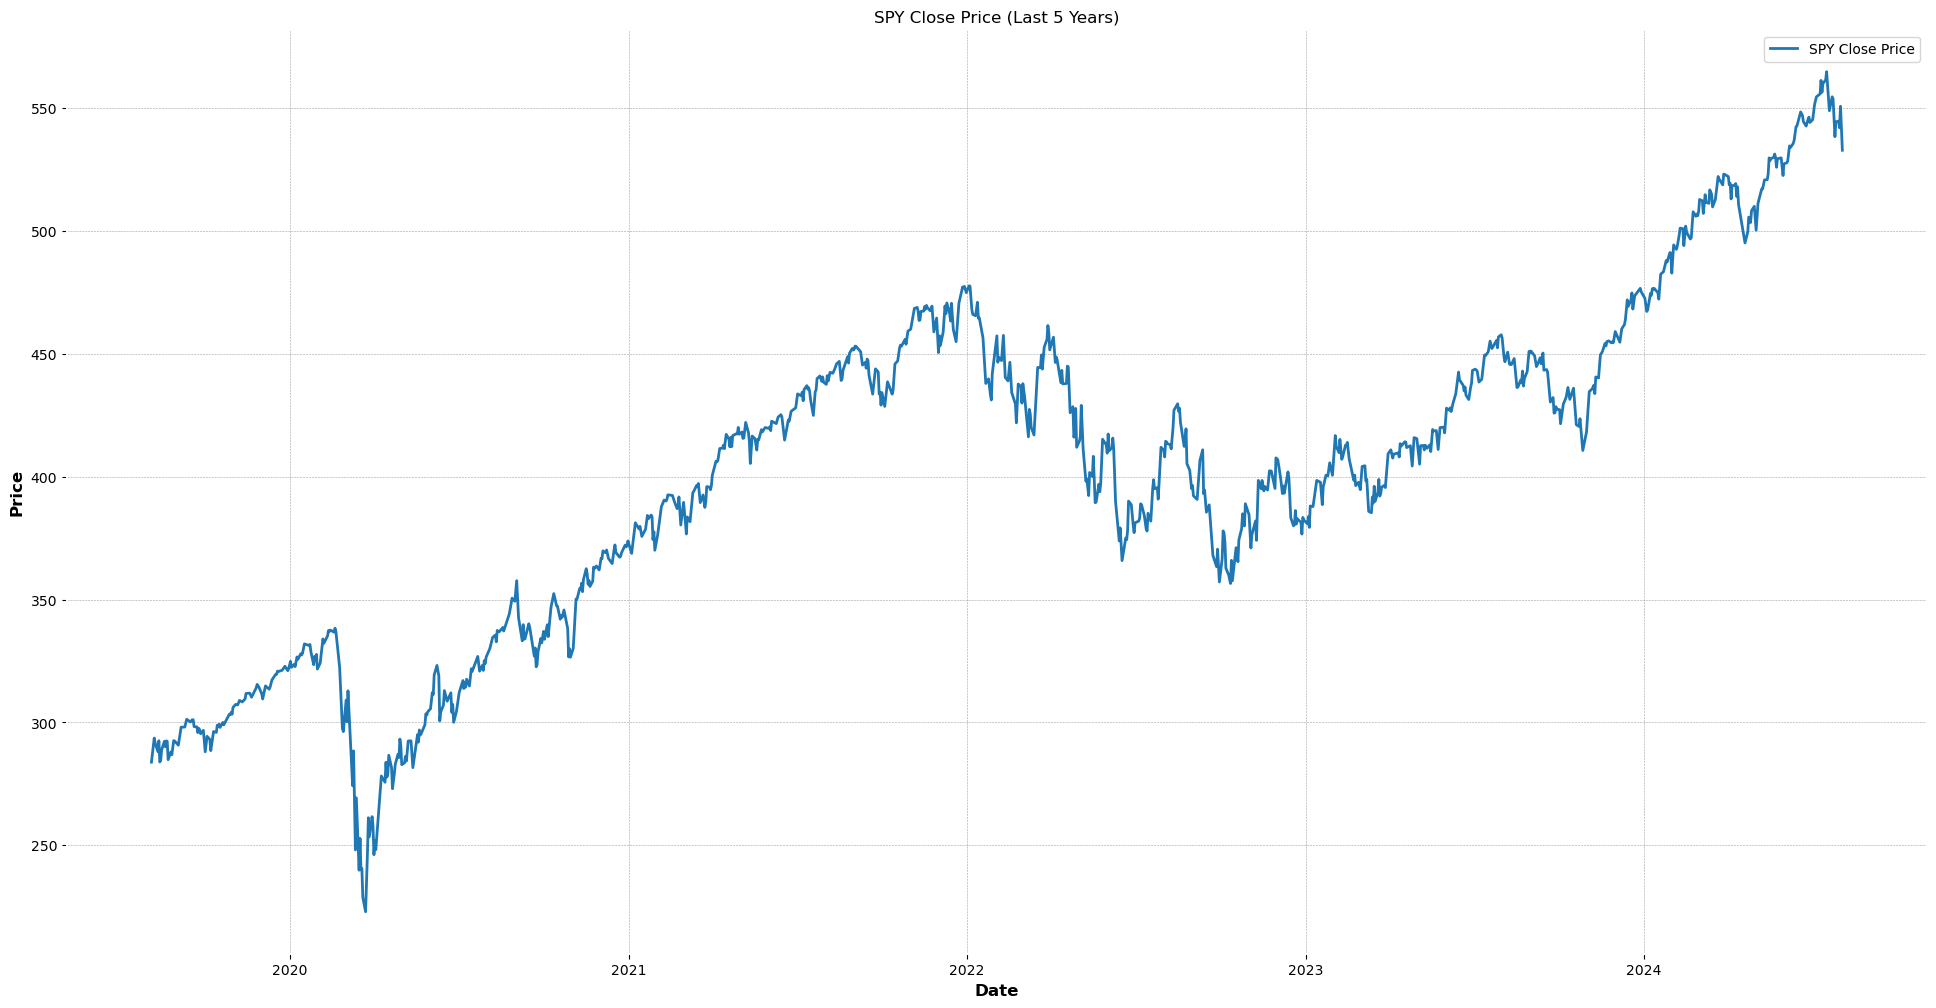

In [60]:
# Fetch historical data for SPY (S&P 500 ETF) for the last 5 years
spy_data = yf.download('SPY', period='5y')

# Use the 'Close' price for analysis
spy_close = spy_data['Close']

# Plot the original signal
plt.figure(figsize=(24, 12))
plt.plot(spy_close, label='SPY Close Price')
plt.title('SPY Close Price (Last 5 Years)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

### Perform the Fourier Transform

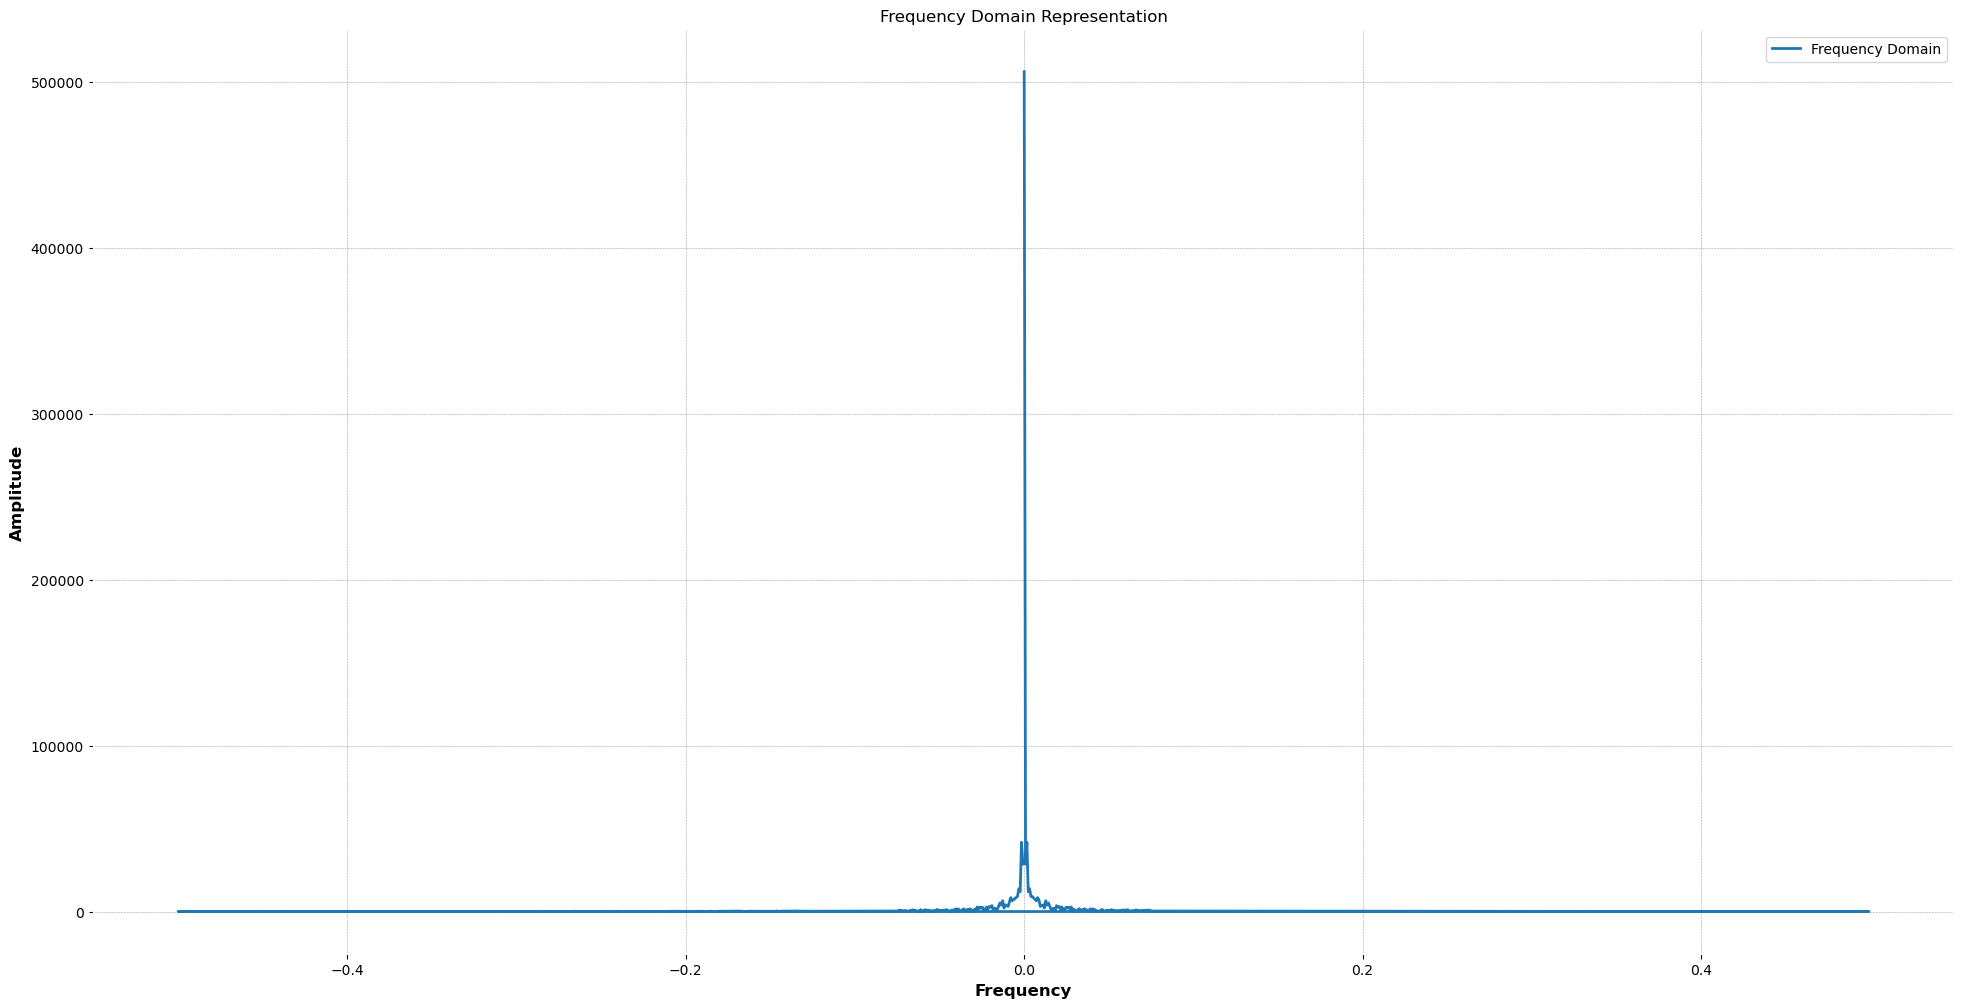

In [61]:
# Perform Fourier Transform using numpy
fft_signal = np.fft.fft(spy_close)

# Plot the frequency domain representation
frequencies = np.fft.fftfreq(len(spy_close))
plt.figure(figsize=(24, 12))
plt.plot(frequencies, np.abs(fft_signal), label='Frequency Domain')
plt.title('Frequency Domain Representation')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

### Filter out our high-frecuency Noise

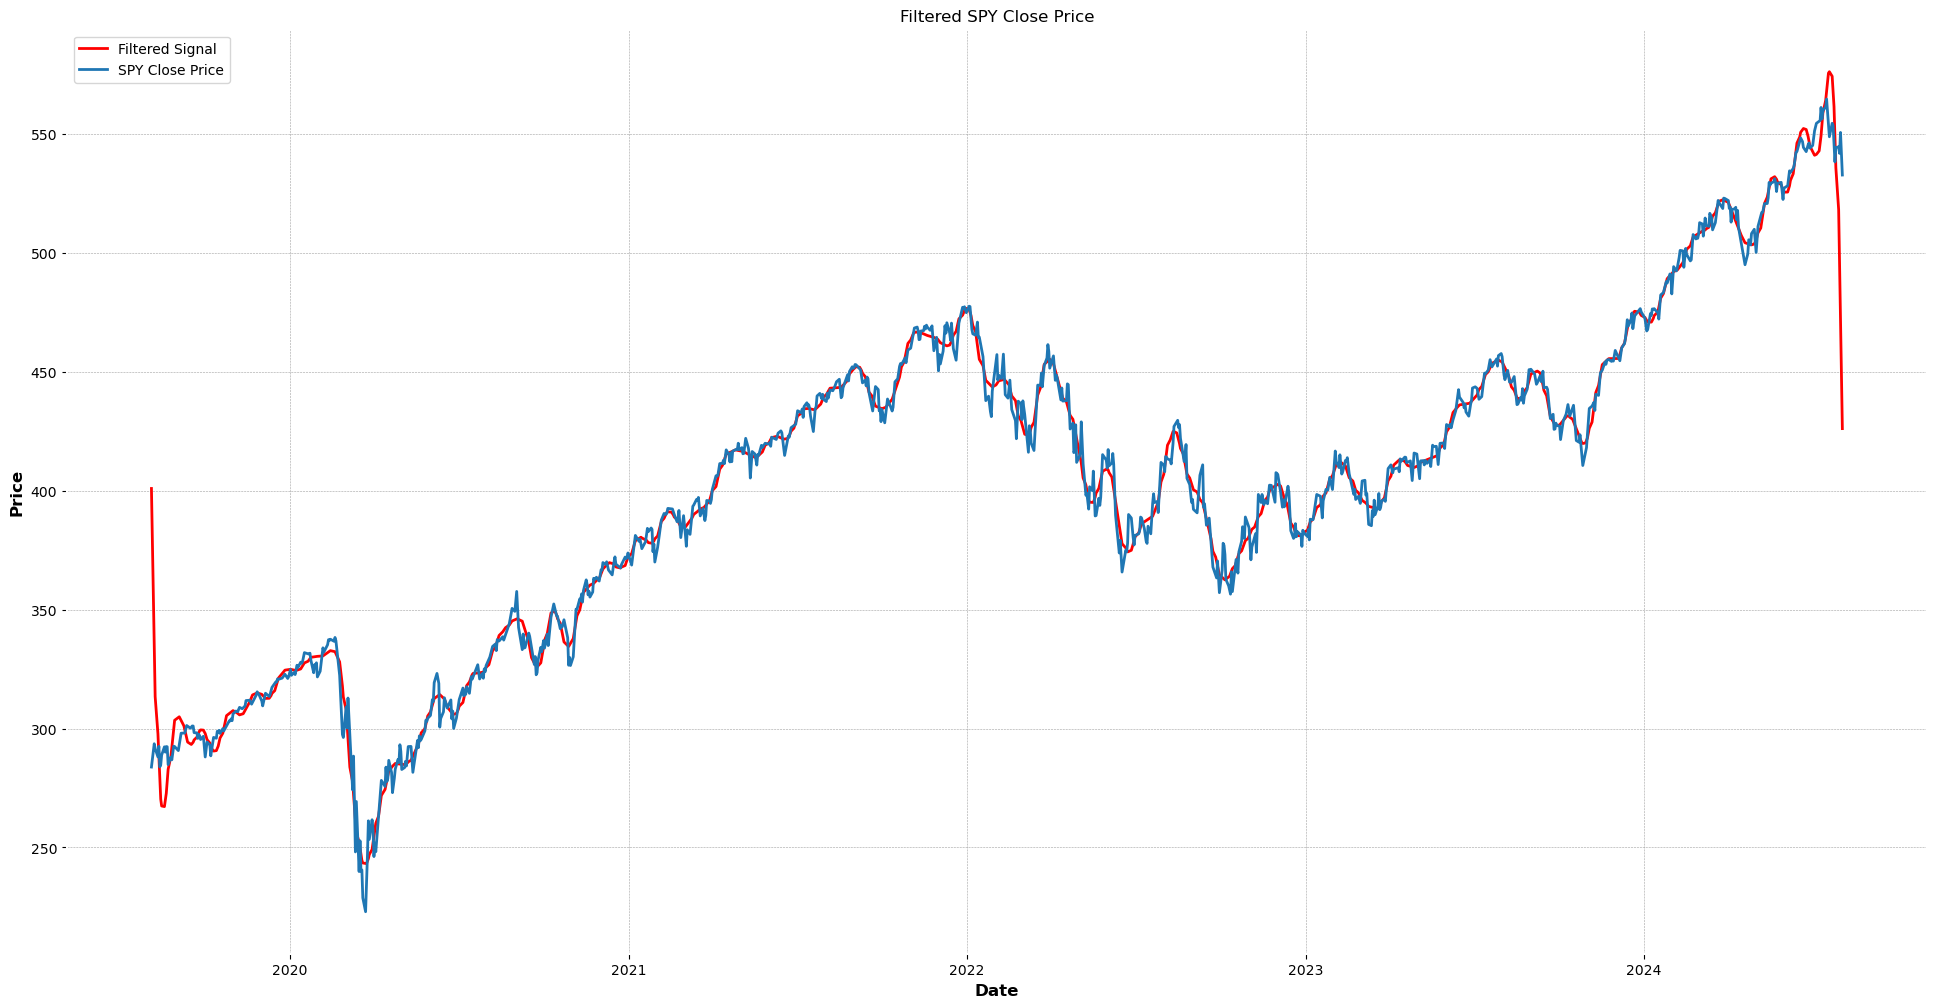

In [62]:
# Filter out high-frequency noise
cutoff_frequency = 0.05  # Example cutoff frequency
fft_signal[np.abs(frequencies) > cutoff_frequency] = 0

# Perform Inverse Fourier Transform to get the filtered signal
filtered_signal = np.fft.ifft(fft_signal)

# Plot the filtered signal
plt.figure(figsize=(24, 12))
plt.plot(spy_data.index, filtered_signal.real, label='Filtered Signal', color='red', alpha=1)
plt.plot(spy_close, label='SPY Close Price', alpha=1)
plt.title('Filtered SPY Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

### Volatility Analysis and Identification

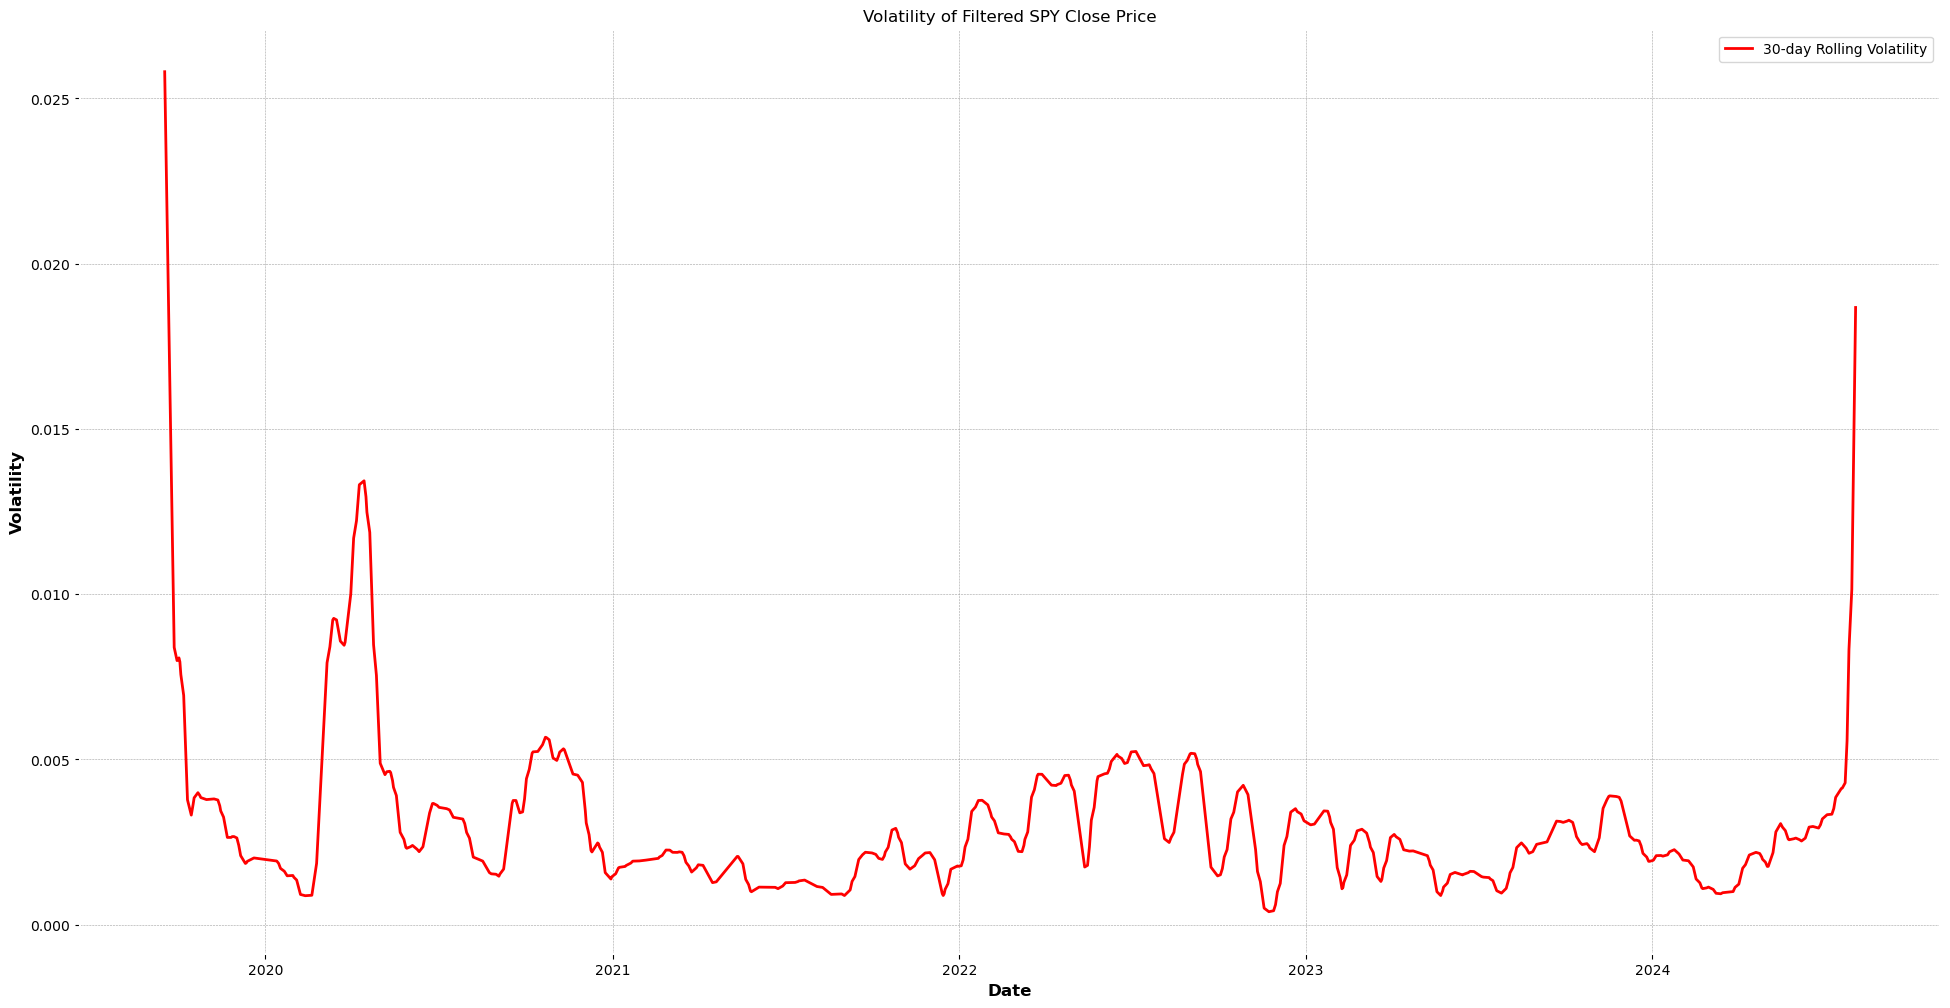

In [63]:
## Volatility Analysis

# Calculate daily returns
daily_returns = pd.Series(filtered_signal.real).pct_change().dropna()

# Calculate volatility (standard deviation of daily returns)
volatility = daily_returns.rolling(window=30).std()

# Plot the volatility
plt.figure(figsize=(24, 12))
plt.plot(spy_data.index[1:], volatility, label='30-day Rolling Volatility', color='red')
plt.title('Volatility of Filtered SPY Close Price')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()


### Forecasting future Prices 

In [ ]:
%pip install pmdarima

[*********************100%%**********************]  1 of 1 completed
C:\Users\pc\AppData\Local\Temp\ipykernel_18932\168021497.py:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  spy_data = spy_data.fillna(method='ffill')


ADF Statistic: -1.0109762853650193
p-value: 0.7492399307521869


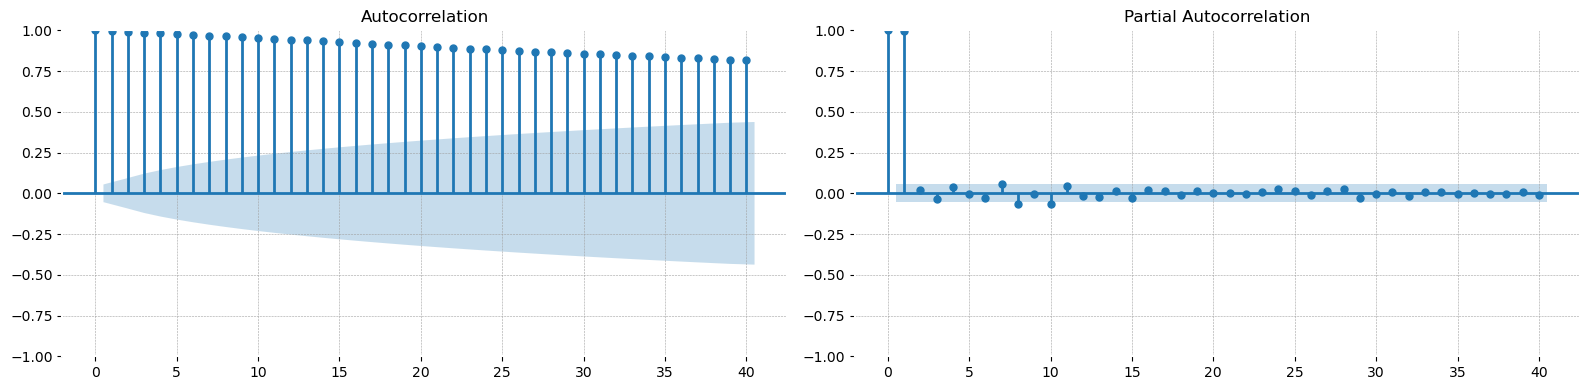

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=7634.790, Time=2.67 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7674.102, Time=0.34 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7666.244, Time=0.53 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7666.763, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7674.367, Time=0.41 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=7669.246, Time=1.72 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=7658.336, Time=2.42 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=7636.178, Time=3.69 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=7637.023, Time=4.55 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7667.311, Time=1.20 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=7670.734, Time=2.73 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=7670.861, Time=3.23 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=7638.003, Time=7.13 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=7635.359, Time=1.30 sec

Best model:  ARIMA(2,1,2)(0,0,0)

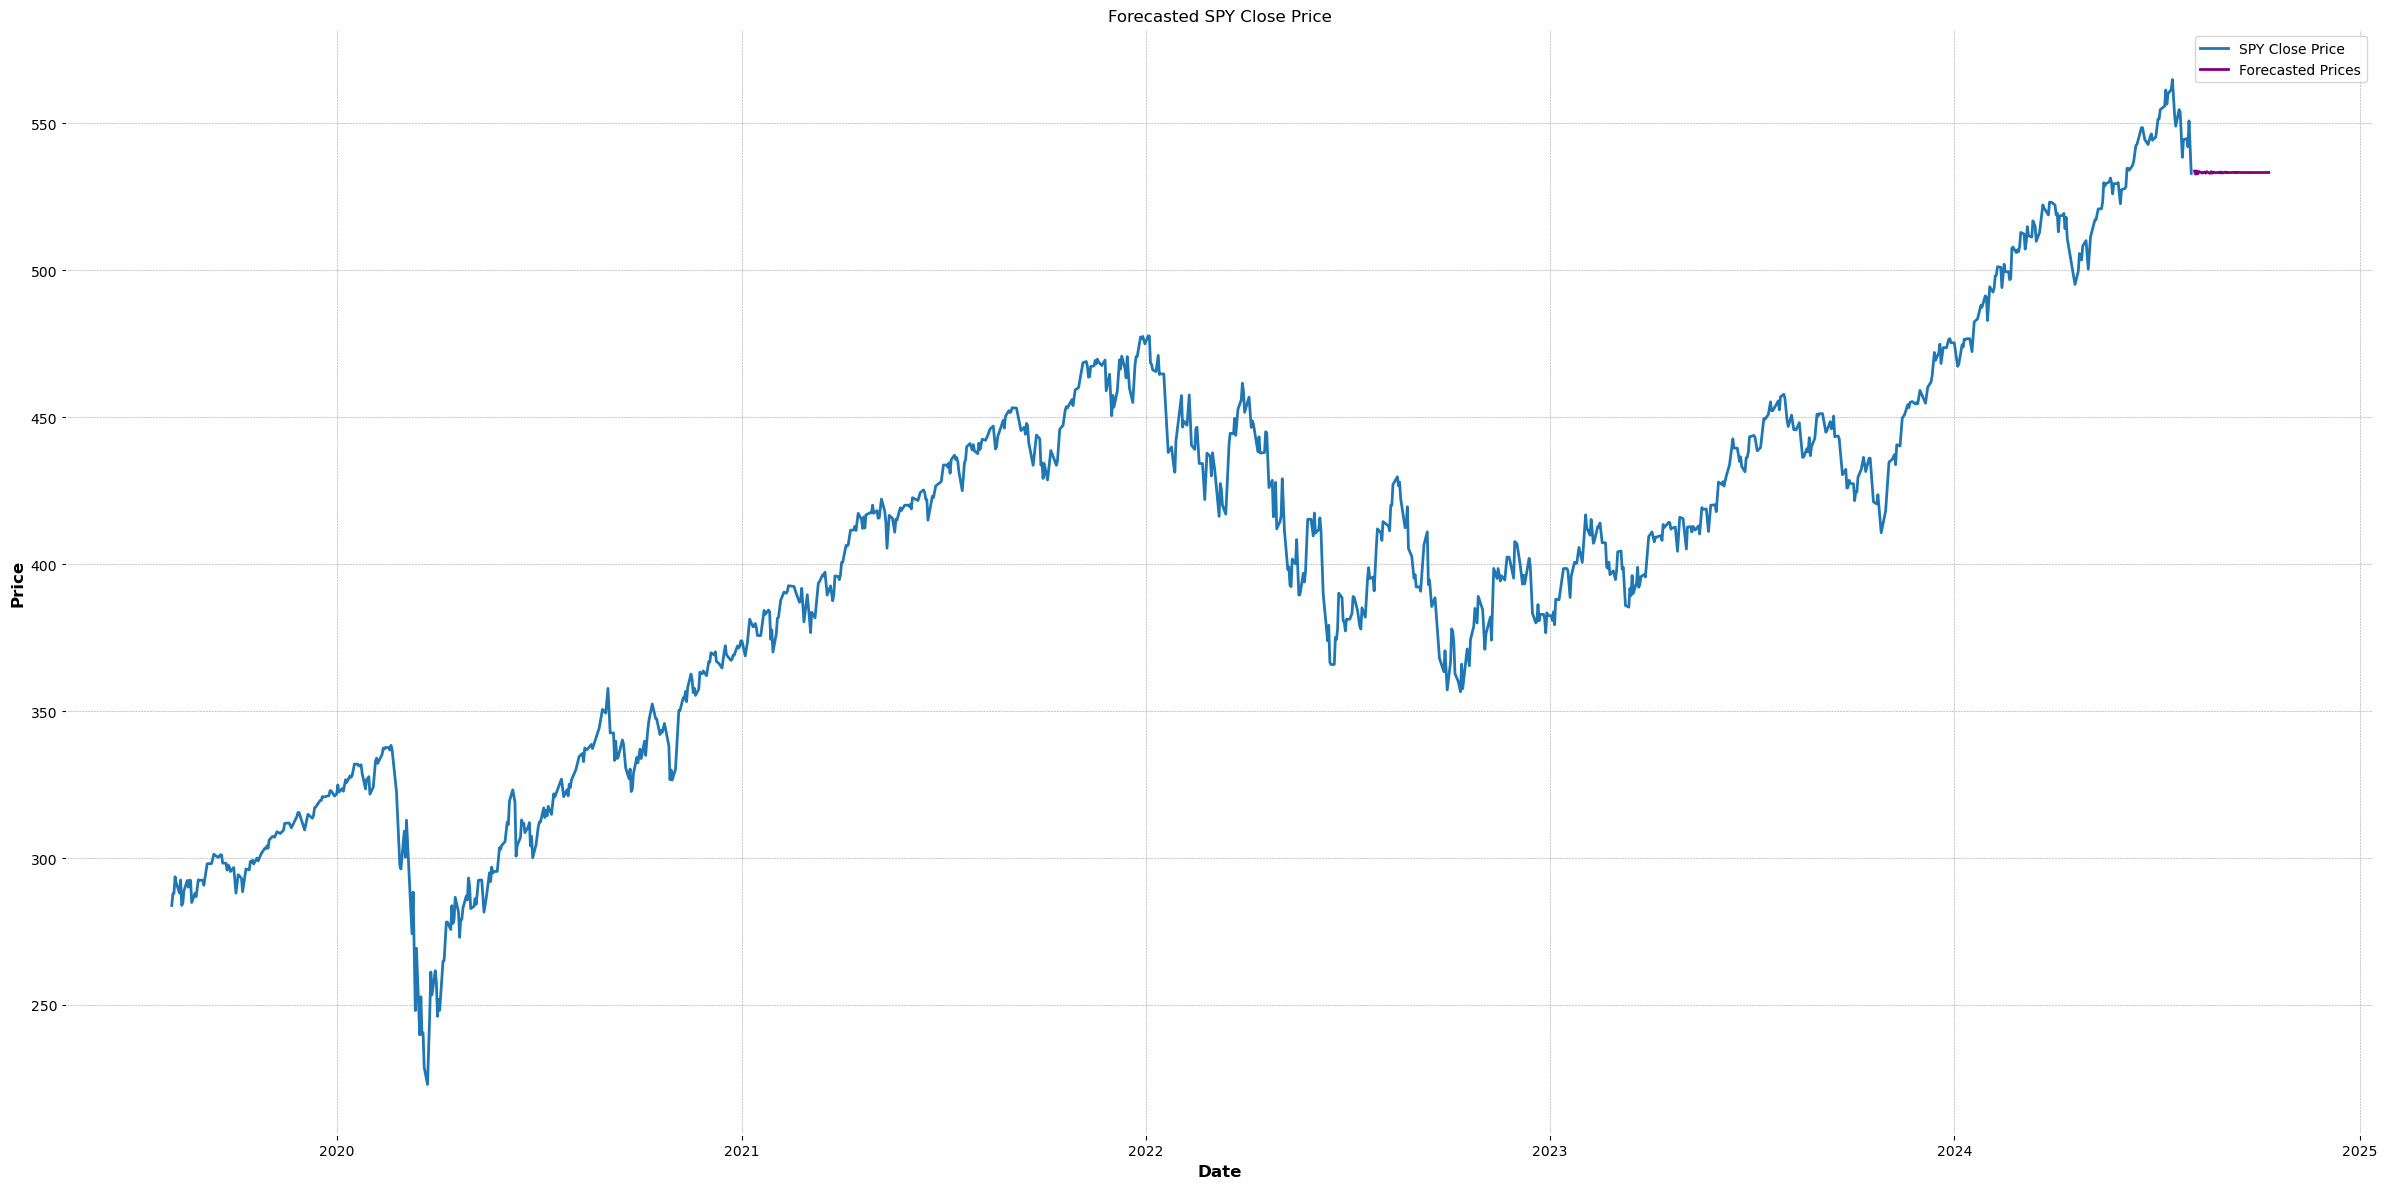

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

# Fetch historical data for SPY (S&P 500 ETF) for the last 5 years
spy_data = yf.download('SPY', period='5y')

# Ensure the date index has a frequency
spy_data.index = pd.DatetimeIndex(spy_data.index)
spy_data = spy_data.asfreq('B')
spy_data = spy_data.fillna(method='ffill')

# Use the 'Close' price for analysis
spy_close = spy_data['Close']

# Check for stationarity with ADF test
result = adfuller(spy_close.dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(spy_close.dropna(), lags=40, ax=axes[0])
plot_pacf(spy_close.dropna(), lags=40, ax=axes[1])
plt.tight_layout()
plt.show()

# Use auto_arima to find the best ARIMA parameters
auto_arima_model = auto_arima(spy_close.dropna(), seasonal=False, trace=True,
                              error_action='ignore', suppress_warnings=True)
print(auto_arima_model.summary())

# Fit the ARIMA model with the determined parameters (p, d, q)
model = ARIMA(spy_close, order=auto_arima_model.order)
model_fit = model.fit()

# Forecast future prices
forecast = model_fit.get_forecast(steps=50)
forecast_index = pd.date_range(start=spy_close.index[-1] + pd.Timedelta(days=1), periods=50, freq='B')
forecast_series = pd.Series(forecast.predicted_mean.values, index=forecast_index)

# Plot the forecasted prices
plt.figure(figsize=(24,12))
plt.plot(spy_close.index, spy_close, label='SPY Close Price')
plt.plot(forecast_series.index, forecast_series, label='Forecasted Prices', color='purple')
plt.title('Forecasted SPY Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [66]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import yfinance as yf

# Fetch historical data for SPY (S&P 500 ETF) for the last 5 years
spy_data = yf.download('SPY', start='2019-01-01', end='2024-01-01')

# Ensure the date index has a frequency
spy_data.index = pd.DatetimeIndex(spy_data.index)
spy_data = spy_data.asfreq('B')
spy_data = spy_data.ffill()  # Updated to use ffill()

# Use the 'Close' price for analysis
spy_close = spy_data['Close']

# Fit the ARIMA model with the determined parameters (example: (1, 1, 1))
model = ARIMA(spy_close, order=(1, 1, 1))
model_fit = model.fit()

# Get the covariance matrix
cov_matrix = model_fit.cov_params()

# Convert the covariance matrix to a DataFrame for better visualization
cov_df = pd.DataFrame(cov_matrix)

# Display the covariance matrix
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(cov_df)

# Export the covariance matrix to a CSV file if needed
cov_df.to_csv('covariance_matrix.csv')



[*********************100%%**********************]  1 of 1 completed


           ar.L1     ma.L1    sigma2
ar.L1   0.015413 -0.016109 -0.009639
ma.L1  -0.016109  0.017046  0.011235
sigma2 -0.009639  0.011235  0.201061
